In this notebook, we will see some tools for doing exploratory data analysis (EDA) on a dataset. 

We'll be using the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset, which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago of Antarctica.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv('../data/penguins.csv')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Question: Do you notice anything when you look at the first five rows of data?**

Let's look and see how many null values we have.

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Another way to count null values is by using the `.isna()` method.

In [5]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Categorical Variables

**Warm-up Question:** How many penguins are there of each sex?

In [ ]:
# Your code here

The NaN values do not show up. Place your cursor inside the parantheses for `value_counts` and press Shift+Tab to look for a way to retain the NaN values.

In [6]:
penguins['sex'].value_counts(dropna = False)

male      168
female    165
NaN        11
Name: sex, dtype: int64

Notice also that we can normalize our value counts. For example, to get the percentage by species, we can use this: 

In [7]:
penguins['sex'].value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

If we want to create a plot showing the number of penguins per species, we can do so using the `.plot` method. We need to specify that we want to create a bar chart.

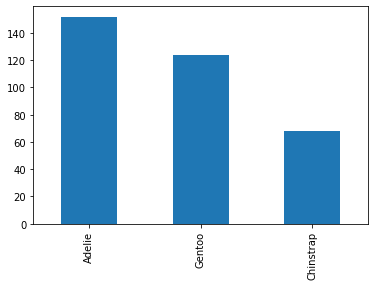

In [8]:
penguins['species'].value_counts().plot(kind = 'bar');

The default plot can be improved using a combination of arguments and matplotlib methods.

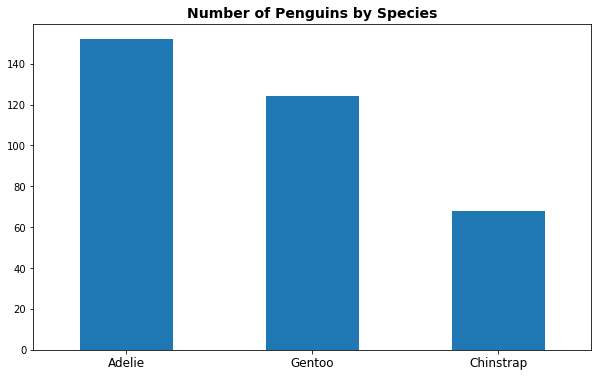

In [19]:
penguins['species'].value_counts().plot(kind = 'bar',
                                        figsize = (10,6))               # Increase the plot size                

plt.xticks(rotation = 0,                                                # Remove the rotation of the labels
           fontsize = 12)                   
plt.title('Number of Penguins by Species',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

## Examining Two Categorical Variables

What if we want to look at a cross-tabulation of the number of observations of each sex broken down by species. 

For this, we can use the `pandas` `crosstab` function. What we need to do is to pass in the two columns we want to create the table based on.

In [ ]:
pd.crosstab(penguins['island'], penguins['species'])

As above, we can take the results and create a plot.

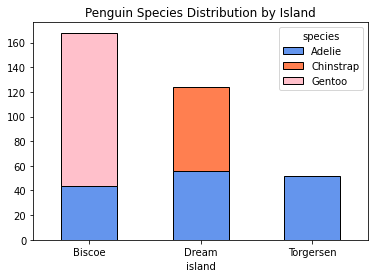

In [20]:
pd.crosstab(penguins['island'], penguins['species']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('Penguin Species Distribution by Island')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

You can also normalize the cross-tabulation. Since we are working with two variables here, we can normalize in a number of ways. 

For example, if we just want the proportion of total observations that are contained in each cell, we can use the `normalize = 'all'` option.

In [21]:
pd.crosstab(penguins['island'], penguins['species'],  normalize = 'all')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.127907,0.000000,0.360465
Dream,0.162791,0.197674,0.000000
Torgersen,0.151163,0.000000,0.000000


Or if we want proportions by row, we can use the `normalize = 'index'` option.

In [22]:
pd.crosstab(penguins['island'], penguins['species'],  normalize = 'index')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.261905,0.000000,0.738095
Dream,0.451613,0.548387,0.000000
Torgersen,1.000000,0.000000,0.000000


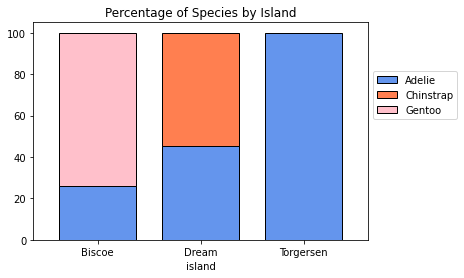

In [23]:
(pd.crosstab(penguins['island'], penguins['species'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage of Species by Island')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot

## Numeric Variables

Now, let's say that we want to study the `body_mass_g` variable.

We can quickly get a quick summary by using the `.describe()` method.

In [24]:
penguins['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

We can also calculate individual summary statistics, many of which have built-in _pandas_ methods.

In [25]:
penguins['body_mass_g'].mean()

4201.754385964912

In [26]:
penguins['body_mass_g'].median()

4050.0

We have a number of options for inspecting the distribution of a numeric variable. In this notebook, we'll look at histograms and box plots.

For histograms, we can use the `.hist()` method from _pandas_.

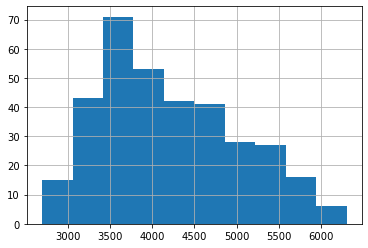

In [27]:
penguins['body_mass_g'].hist();

As before, we can easily make modifications to this plot.

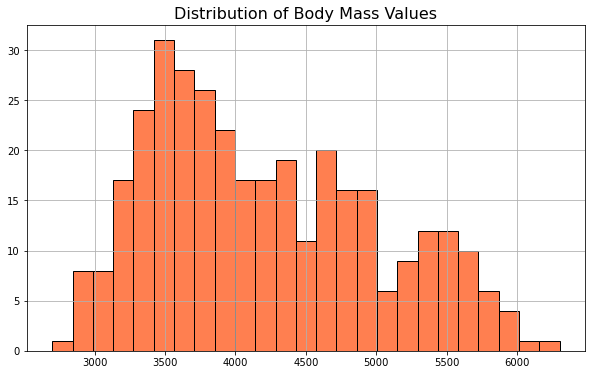

In [28]:
penguins['body_mass_g'].hist(bins = 25,
                            color = 'coral',
                            edgecolor = 'black',
                            figsize = (10,6))

plt.title('Distribution of Body Mass Values', fontsize = 16);

The _pandas_ library also includes a boxplot method, but we can get a nicer looking one using the _seaborn_ library.

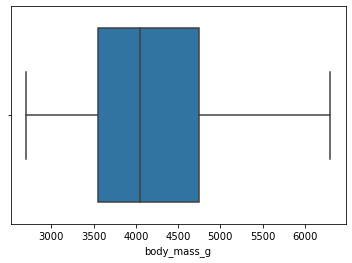

In [29]:
sns.boxplot(data = penguins,
            x = 'body_mass_g');

Note that if we want to increase the figure size when using seaborn, we cannot pass it in as an argument but must use either the `.figure()` or `.subplots()` function from matplotlib.

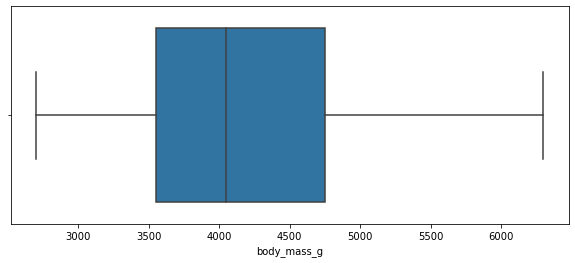

In [30]:
plt.figure(figsize = (10,4))

sns.boxplot(data = penguins,
            x = 'body_mass_g');

## Categorical-Numeric Combinations

The histogram of body mass values is not exactly symmetric and appears to have a number of subgroups. Perhaps this distribution shape could be explained by looking at the body mass distribution by species. Let's say we want to look at the average body mass by species.

One way to do this is to use `.groupby`.

Quite often when using `.groupby()`, our goal is to calculate an aggregate value by group. To use `.groupby()`, we need to tell pandas: 
* **what** to group by
* **which** column (or columns) we want to aggregate
* **how** to aggregate

In this case, we want to group by `species` and then aggregate the `body_mass_g` column by taking the _mean_.

In [31]:
penguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

You can even use `.describe` with `groupby` to get even more information by species.

In [32]:
penguins.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


**Question:** Looking at the summary statistics by group, what do you notice?

We can easily compare distributions using a grouped boxplot.

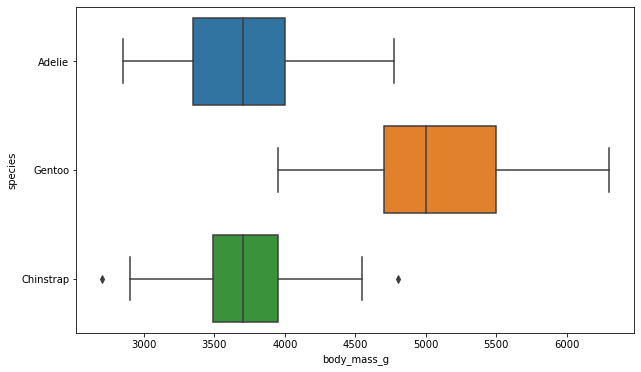

In [33]:
plt.figure(figsize = (10,6))

sns.boxplot(data = penguins,
           x = 'body_mass_g',
           y = 'species');

## Comparing Two Numeric Variables

One way to assess the relationship between two numeric variables is to find the correlation. This can be accomplished using the `.corr()` method, which returns the correlation matrix.

In [34]:
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


**Question:** Do you notice anything interesting when inspecting the correlation values?

Let's investigate the relationship between bill length and bill depth. We can do this using a scatterplot.

First, let's use the `.plot` method from pandas.

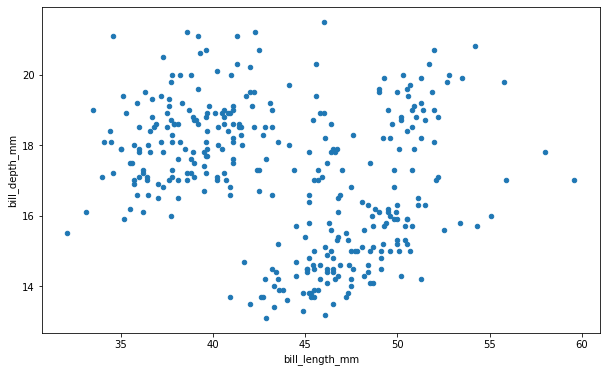

In [35]:
penguins.plot(kind = 'scatter',
             x = 'bill_length_mm',
             y = 'bill_depth_mm',
             figsize = (10,6));

We do need to remember that we have multiple species of penguins. To get a better understanding of the relationship between these variables, we could color the points by species. The easiest way to do this is using the _seaborn_ library.

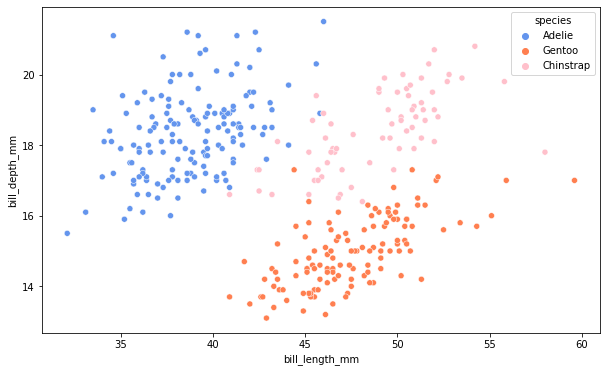

In [36]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = penguins,
               x = 'bill_length_mm',
               y = 'bill_depth_mm',
               hue = 'species',
               palette = ['cornflowerblue', 'coral', 'pink']);

**Question:** What is the correlation between bill length and bill depth if we just look at the Gentoo species?

In [37]:
# Your code here